**Programming Assignment #1**


Group members:

1.   Cerad, Mary Grace O.
2.   Balatico, Alliyah Jeanne A.
3.   Jovellanos, Miko Angelo D.

In [24]:
import pandas as pd

# Load the dataset using a relative path - assuming the file is in the same directory as the notebook
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Display the first few rows of the dataset with styling
df.head().style.set_table_styles([
    {'selector': 'table', 'props': [('border', '1px solid black')]},
    {'selector': 'th', 'props': [('background-color', 'cyan'), ('color', 'black'), ('border', '1px solid black')]},
    {'selector': 'td', 'props': [('background-color', 'violet'), ('color', 'black'), ('border', '1px solid black')]},
])

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


### **1. Overview of the Dataset**


*   How many rows and columns does the dataset contain?

In [ ]:
# Install pip colorama using !pip install colorama
import pandas as pd
from colorama import Fore, Back, Style

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')
# prompt: create a program that counts the number of rows and columns in the spotify-2023.csv

# Get the number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]

# Print the results
print(Fore.BLACK + Back.WHITE + Style.BRIGHT + '*************************')
print(Fore.BLACK + Back.WHITE + Style.BRIGHT + '* Number of rows: ' + str(num_rows) + '   *')
print(Fore.BLACK + Back.WHITE + Style.BRIGHT + '* Number of cols: ' + str(num_cols) + '    *')
print(Fore.BLACK + Back.WHITE + Style.BRIGHT + '*************************' + Style.RESET_ALL)


*************************
* Number of rows: 953   *
* Number of cols: 24    *
*************************


*   What are the data types of each column? Are there any missing values?

In [ ]:
# prompt: create a program that list the data types of each column and provide values for missing quantity, style the output in a table using numpy

import pandas as pd
import numpy as np

# Get data types of each column
data_types = df.dtypes

# Get the number of missing values in each column
missing_values = df.isnull().sum()

# Create a new DataFrame with the results
results_df = pd.DataFrame({'Data Type': data_types, 'Missing Values': missing_values})

# Style the DataFrame
styled_results = results_df.style.set_table_styles([
    {'selector': 'table', 'props': [('border', '1px solid black')]},
    {'selector': 'th', 'props': [('background-color', 'cyan'), ('color', 'black'), ('border', '1px solid black')]},
    {'selector': 'td', 'props': [('background-color', 'violet'), ('color', 'black'), ('border', '1px solid black')]},
])


# Display the styled DataFrame
display(styled_results)



,Data Type,Missing Values
track_name,object,0
artist(s)_name,object,0
artist_count,int64,0
released_year,int64,0
released_month,int64,0
released_day,int64,0
in_spotify_playlists,int64,0
in_spotify_charts,int64,0
streams,object,0
in_apple_playlists,int64,0


**The data type with missing value/s:**


1.   **in_shazam_charts**: 50
2.   **key**: 95



### 2. **Basic Descriptive Statistics**

*   What are the mean, median, and standard deviation of the streams column?

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Convert the 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Calculate the mean, median, and standard deviation of the 'streams' column
streams_stats = df['streams'].agg(['mean', 'median', 'std'])

# Display the results with styling
streams_stats.to_frame().style.set_table_styles([
    {'selector': 'table', 'props': [('border', '1px solid black')]},
    {'selector': 'th', 'props': [('background-color', 'pink'), ('color', 'black'), ('border', '1px solid black')]},
    {'selector': 'td', 'props': [('background-color', 'green'), ('color', 'white'), ('border', '1px solid black')]},
])

,streams
mean,514137424.939076
median,290530915.000000
std,566856949.038883


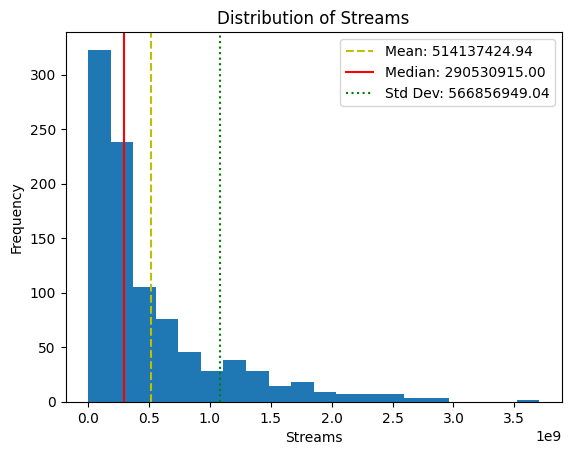

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Convert the 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Calculate the mean, median, and standard deviation of the 'streams' column
streams_mean = df['streams'].mean()
streams_median = df['streams'].median()
streams_std = df['streams'].std()

# Create a histogram of the 'streams' column
plt.hist(df['streams'], bins=20)
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.title('Distribution of Streams')

# Add vertical lines for the mean, median, and standard deviation
plt.axvline(streams_mean, color='y', linestyle='--', label=f'Mean: {streams_mean:.2f}')
plt.axvline(streams_median, color='r', linestyle='-', label=f'Median: {streams_median:.2f}')
plt.axvline(streams_mean + streams_std, color='g', linestyle=':', label=f'Std Dev: {streams_std:.2f}')


plt.legend()
plt.show()

*   What is the distribution of released_year and artist_count? Are there any noticeable trends
or outliers?

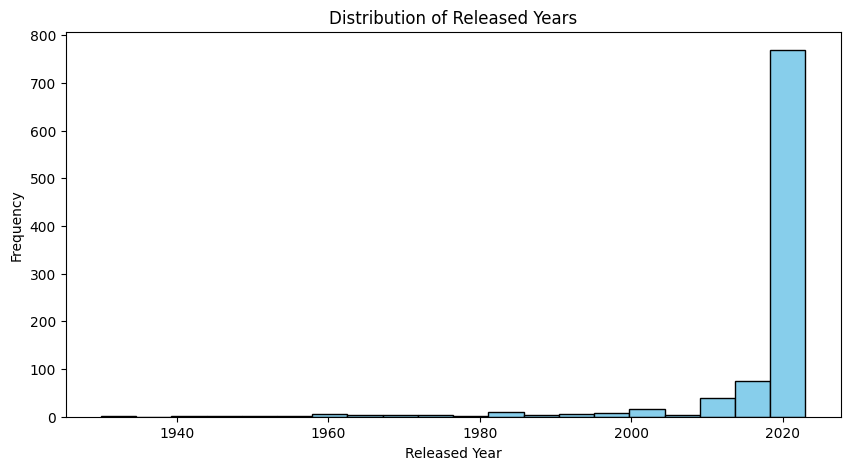

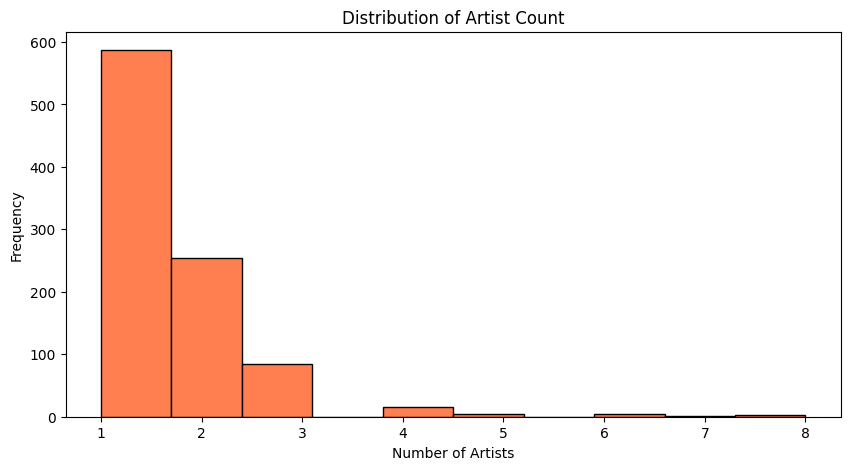

Descriptive statistics for Released Year:
count     953.000000
mean     2018.238195
std        11.116218
min      1930.000000
25%      2020.000000
50%      2022.000000
75%      2022.000000
max      2023.000000
Name: released_year, dtype: float64

Descriptive statistics for Artist Count:
count    953.000000
mean       1.555089
std        0.887209
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: artist_count, dtype: float64

Outliers for released year:
                                                                       track_name                                                          artist(s)_name  released_year
                                                                 I Wanna Be Yours                                                          Arctic Monkeys           2013
                                                                      Blank Space                                                            Taylor Sw

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# --- Released Year Distribution ---
plt.figure(figsize=(10, 5))
plt.hist(df['released_year'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.title('Distribution of Released Years')
plt.show()

# --- Artist Count Distribution ---

# Assuming 'artist_count' is a column representing the number of artists per song
# If not, you'll need to create this column first

# Example: If 'artists' column contains a list of artists separated by commas
df['artist_count'] = df['artist(s)_name'].str.split(',').apply(len)

plt.figure(figsize=(10, 5))
plt.hist(df['artist_count'], bins=10, color='coral', edgecolor='black')
plt.xlabel('Number of Artists')
plt.ylabel('Frequency')
plt.title('Distribution of Artist Count')
plt.show()

# --- Trends and Outliers ---
print("Descriptive statistics for Released Year:")
print(df['released_year'].describe())

print("\nDescriptive statistics for Artist Count:")
print(df['artist_count'].describe())

# Outlier detection for released year (using IQR)
Q1 = df['released_year'].quantile(0.25)
Q3 = df['released_year'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['released_year'] < lower_bound) | (df['released_year'] > upper_bound)]

print(f"\nOutliers for released year:")
if not outliers.empty:
  print(outliers[['track_name', 'artist(s)_name', 'released_year']].to_string(index=False))
else:
  print("No outliers found for released year.")

# Outlier detection for artist count (using IQR)
Q1 = df['artist_count'].quantile(0.25)
Q3 = df['artist_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['artist_count'] < lower_bound) | (df['artist_count'] > upper_bound)]

print(f"\nOutliers for artist count:")
if not outliers.empty:
  # Use tabulate to make the table neater
  !pip install tabulate
  from tabulate import tabulate
  print(tabulate(outliers[['track_name', 'artist(s)_name', 'artist_count']], headers='keys', tablefmt='psql'))
else:
  print("No outliers found for artist count.")

# Further analysis and visualization can be done based on these initial findings
# For example, you might want to create scatter plots, box plots, or investigate
# specific years or artist counts in more detail.

### **3. Top Perfomers**

*   Which track has the highest number of streams? Display the top 5 most streamed tracks.

In [ ]:
import pandas as pd
from prettytable import PrettyTable

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Convert the 'streams' column to numeric, handling errors
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Function to format stream count
def format_streams(streams):
  if streams >= 1e9:
    return f"{streams/1e9:.1f}B"
  elif streams >= 1e6:
    return f"{streams/1e6:.1f}M"
  else:
    return f"{streams:,.0f}"

# Apply the formatting to the streams column
df['formatted_streams'] = df['streams'].apply(format_streams)

# Sort the DataFrame by streams in descending order
df_sorted = df.sort_values(by='streams', ascending=False)

# Display the top 5 most streamed tracks with formatted streams
top_5_tracks = df_sorted[['track_name', 'artist(s)_name', 'formatted_streams']].head(5)

# Use prettytable to display the results in a formatted table
table = PrettyTable()
table.field_names = ["Track Name", "artist(s)_name", "Streams"]
for index, row in top_5_tracks.iterrows():
    table.add_row([row['track_name'], row['artist(s)_name'], row['formatted_streams']])

# Add some styling
table.align = "l"  # Left align text
table.hrules = 1  # Add horizontal lines between rows

print(table)

+-----------------------------------------------+-----------------------+---------+
| Track Name                                    | artist(s)_name        | Streams |
+-----------------------------------------------+-----------------------+---------+
| Blinding Lights                               | The Weeknd            | 3.7B    |
+-----------------------------------------------+-----------------------+---------+
| Shape of You                                  | Ed Sheeran            | 3.6B    |
+-----------------------------------------------+-----------------------+---------+
| Someone You Loved                             | Lewis Capaldi         | 2.9B    |
+-----------------------------------------------+-----------------------+---------+
| Dance Monkey                                  | Tones and I           | 2.9B    |
+-----------------------------------------------+-----------------------+---------+
| Sunflower - Spider-Man: Into the Spider-Verse | Post Malone, Swae Lee | 2.

*   Who are the top 5 most frequent artists based on the number of tracks in the dataset?

In [ ]:
# prompt: create a program that states the 5 most frequent artists based on the number of tracks in the dataset, make the data in table form with styling

import pandas as pd
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Group by artist and count the number of tracks
artist_track_counts = df.groupby('artist(s)_name')['track_name'].count().sort_values(ascending=False)

# Get the top 5 most frequent artists
top_5_artists = artist_track_counts.head(5)

# Create a PrettyTable for the results
table = PrettyTable()
table.field_names = ["Artist", "Number of Tracks"]

for artist, count in top_5_artists.items():
  table.add_row([artist, count])

# Add some styling
table.align = "l"  # Left align text
table.hrules = 1  # Add horizontal lines between rows

# Display the table
print(table)


+--------------+------------------+
| Artist       | Number of Tracks |
+--------------+------------------+
| Taylor Swift | 34               |
+--------------+------------------+
| The Weeknd   | 22               |
+--------------+------------------+
| SZA          | 19               |
+--------------+------------------+
| Bad Bunny    | 19               |
+--------------+------------------+
| Harry Styles | 17               |
+--------------+------------------+


####**4 Temporal Trends**

*   Analyze the trends in the number of tracks released over time. Plot the
number of tracks released per year.

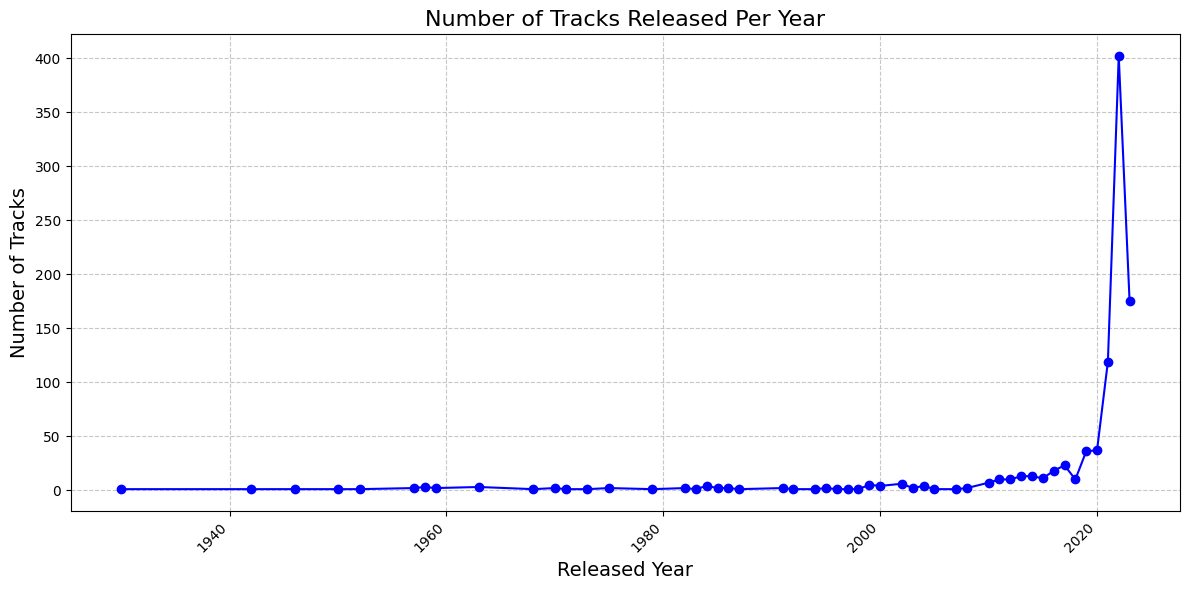

In [ ]:
# prompt: Create a program that Analyze the trends in the number of tracks released over time. Plot the number of tracks
# released per year, make it in a stylized graph add a grid line

import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Group by released year and count the number of tracks
tracks_per_year = df.groupby('released_year')['track_name'].count()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(tracks_per_year.index, tracks_per_year.values, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('Number of Tracks Released Per Year', fontsize=16)
plt.xlabel('Released Year', fontsize=14)
plt.ylabel('Number of Tracks', fontsize=14)

# Customize the grid
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines

# Add styling
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing


# Show the plot
plt.show()

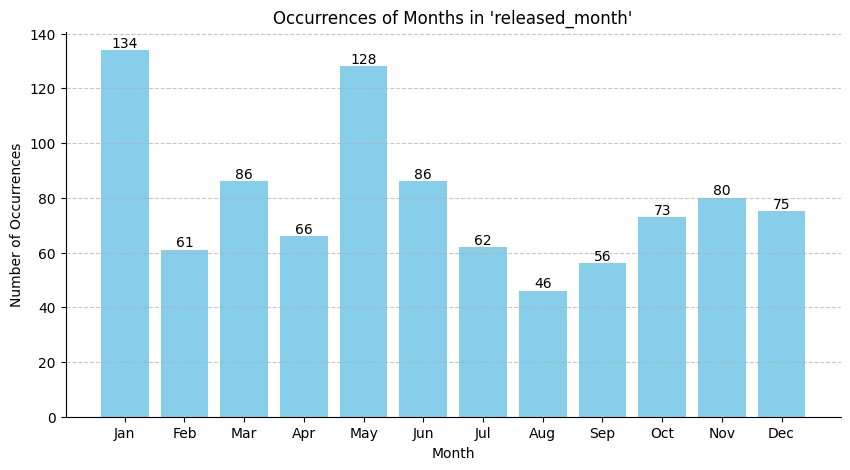

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Count occurrences of each month value in 'released_month'
month_counts = df['released_month'].value_counts().sort_index()

# Ensure all months from 1 to 12 are included
month_counts = month_counts.reindex(range(1, 13), fill_value=0)

# Create a bar graph with value labels
plt.figure(figsize=(10, 5))
bars = plt.bar(month_counts.index, month_counts.values, color='skyblue')

# Set x-axis labels to month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1, 13), month_names)

# Add labels and title
plt.xlabel("Month")
plt.ylabel("Number of Occurrences")
plt.title("Occurrences of Months in 'released_month'")

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             str(int(height)), ha='center', va='bottom')

# Show the plot
plt.show()

The graph represents the month with highest songs played are the month of **January** followed by the month of **May**. Which coincidently the months where people had more vacancy **(January)** and/or at large people gathering or festivals **(May)**.

### **5. Genre and Music Characteristics**

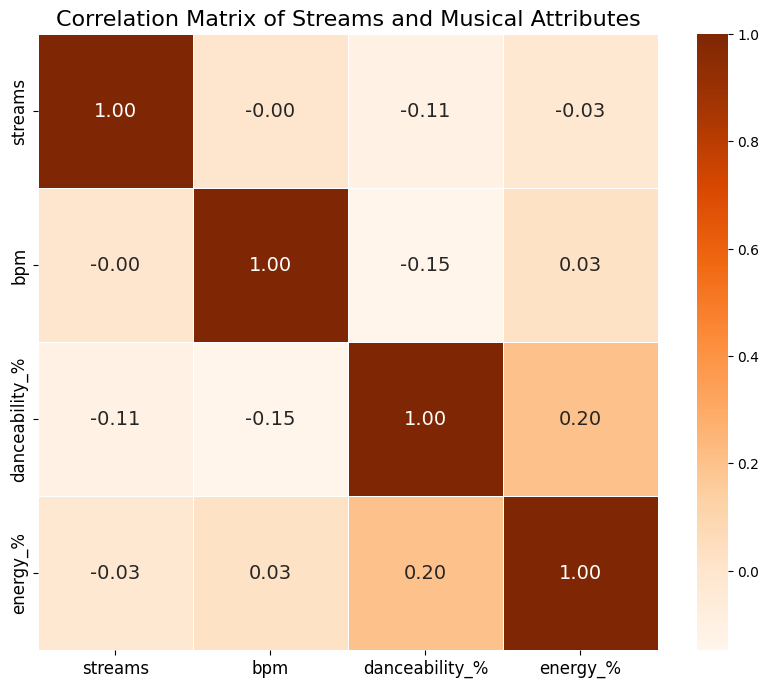


Attribute(s) with the strongest influence on streams:
danceability_%   -0.105457
Name: streams, dtype: float64


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Convert 'streams' column to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Select relevant columns for correlation analysis
attributes = ['bpm', 'danceability_%', 'energy_%']
df_corr = df[['streams'] + attributes].dropna()

# Calculate correlation matrix
corr_matrix = df_corr.corr()

# Create a heatmap with white and blue color scheme
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges', fmt=".2f", linewidths=.5, annot_kws={"size": 14})
plt.title('Correlation Matrix of Streams and Musical Attributes', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Identify attributes with highest correlation to streams
corr_with_streams = corr_matrix['streams'].drop('streams')
most_influential = corr_with_streams[abs(corr_with_streams) == abs(corr_with_streams).max()]

print("\nAttribute(s) with the strongest influence on streams:")
print(most_influential)

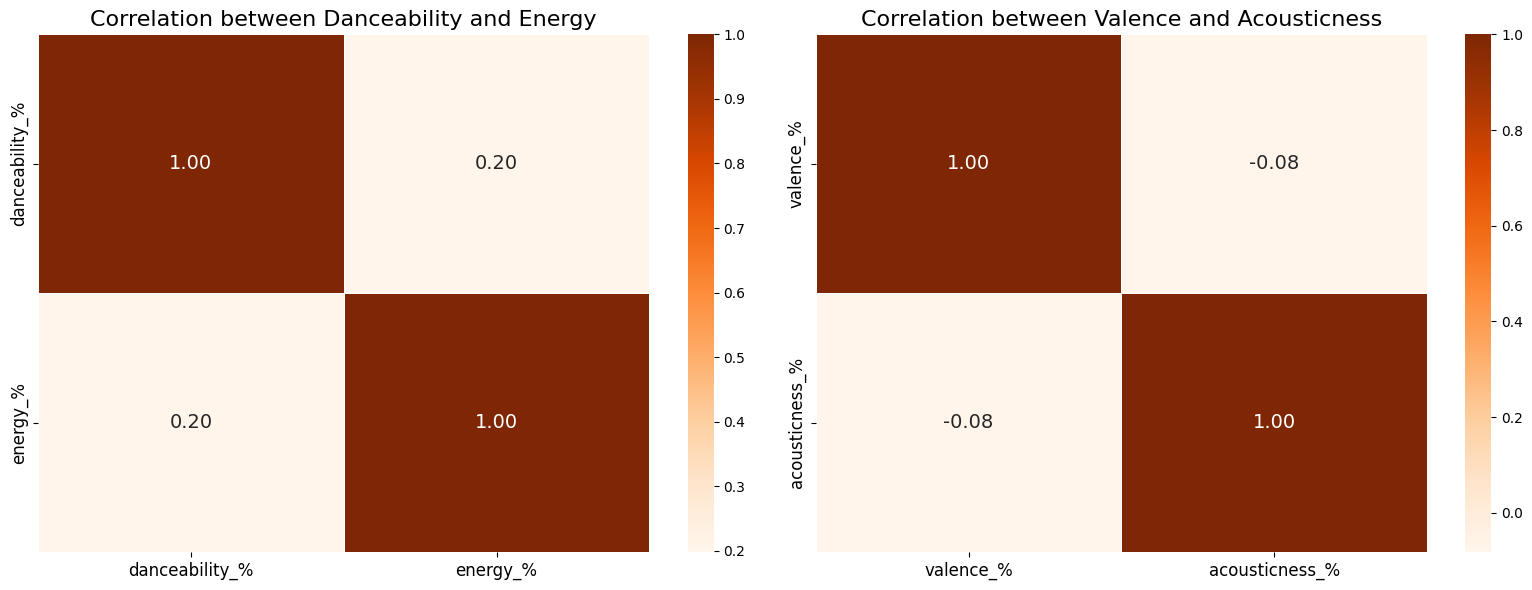


Correlation between danceability_% and energy_%: 0.20
Correlation between valence_% and acousticness_%: -0.08


In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Select relevant columns for correlation analysis
attributes1 = ['danceability_%', 'energy_%']
attributes2 = ['valence_%', 'acousticness_%']

# Calculate correlation matrices
corr_matrix1 = df[attributes1].corr()
corr_matrix2 = df[attributes2].corr()

# Create heatmaps with improved design and white and blue color scheme
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_matrix1, annot=True, cmap='Oranges', fmt=".2f", linewidths=.5, annot_kws={"size": 14}, ax=axes[0]) # Changed color scheme to 'Blues'
axes[0].set_title('Correlation between Danceability and Energy', fontsize=16)
axes[0].tick_params(labelsize=12)

sns.heatmap(corr_matrix2, annot=True, cmap='Oranges', fmt=".2f", linewidths=.5, annot_kws={"size": 14}, ax=axes[1]) # Changed color scheme to 'Blues'
axes[1].set_title('Correlation between Valence and Acousticness', fontsize=16)
axes[1].tick_params(labelsize=12)

plt.tight_layout()
plt.show()

# Print correlation values
print(f"\nCorrelation between danceability_% and energy_%: {corr_matrix1.iloc[0, 1]:.2f}")
print(f"Correlation between valence_% and acousticness_%: {corr_matrix2.iloc[0, 1]:.2f}")

### **6. Platform Popularity**

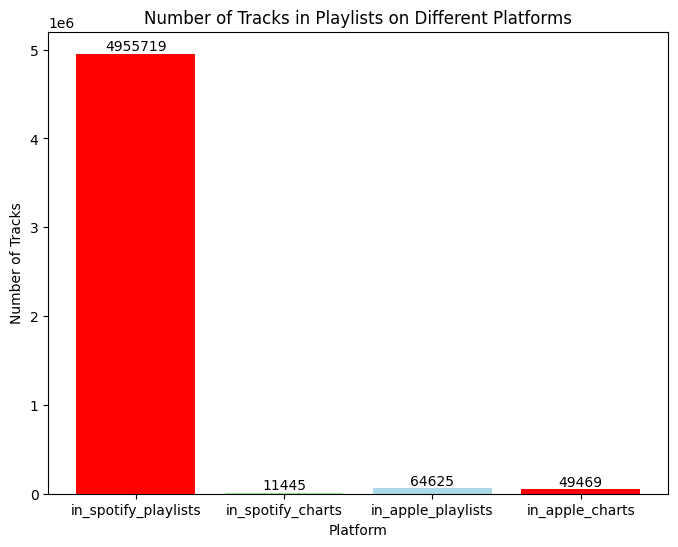


in_spotify_playlists seems to favor the most popular tracks.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Count tracks in each platform's playlists
platform_counts = df[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists','in_apple_charts']].sum()

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(platform_counts.index, platform_counts.values, color=['red', 'lightgreen', 'lightblue'])
plt.xlabel("Platform")
plt.ylabel("Number of Tracks")
plt.title("Number of Tracks in Playlists on Different Platforms")

# Add value labels above each bar
for i, v in enumerate(platform_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

# Identify the platform with the most popular tracks
most_popular_platform = platform_counts.idxmax()
print(f"\n{most_popular_platform} seems to favor the most popular tracks.")

#### **7. Musical Notes**

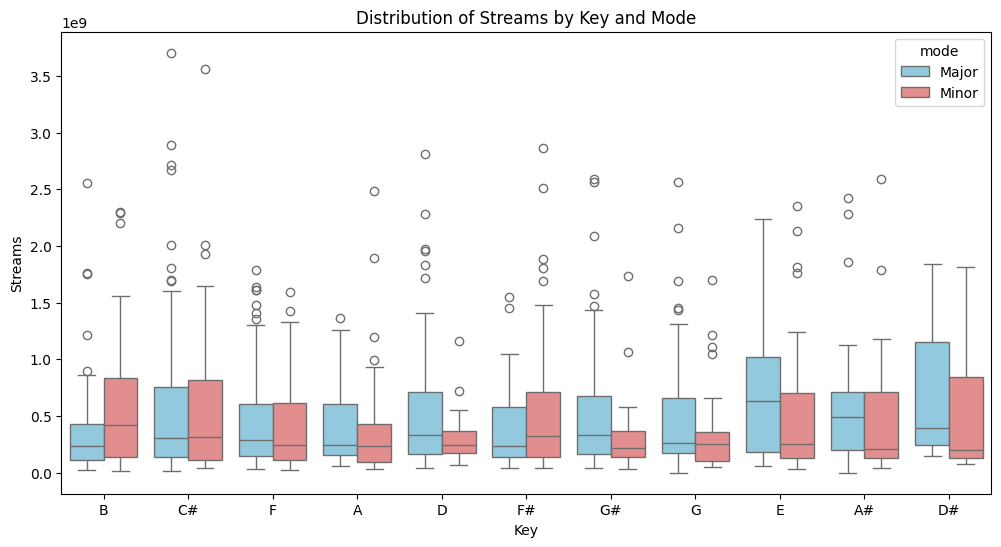


Average streams for tracks in Major key: 534832793.34
Average streams for tracks in Minor key: 485944478.91


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Convert 'streams' column to numeric
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Group data by key and mode and calculate average streams
key_mode_streams = df.groupby(['key', 'mode'])['streams'].mean().reset_index()

# Create a box plot for streams by key
plt.figure(figsize=(12, 6))
sns.boxplot(x='key', y='streams', data=df, hue='mode', palette={'Major': 'skyblue', 'Minor': 'lightcoral'})
plt.title('Distribution of Streams by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Streams')
plt.show()

# Calculate average streams for major and minor keys
major_streams = df[df['mode'] == 'Major']['streams'].mean()
minor_streams = df[df['mode'] == 'Minor']['streams'].mean()

print(f"\nAverage streams for tracks in Major key: {major_streams:.2f}")
print(f"Average streams for tracks in Minor key: {minor_streams:.2f}")

# Further analysis could involve:
# - Comparing streams across different keys within major or minor modes
# - Investigating the relationship between key, mode, and other attributes like danceability or energy
# - Analyzing trends over time for different keys and modes

Most frequently appearing artists in playlists and charts:

The Weeknd: 147258
Taylor Swift: 137178
Ed Sheeran: 130788
Harry Styles: 112497
Kendrick Lamar: 59772
Bad Bunny: 53026
SZA: 46399
BTS: 19409
Feid: 14956
Morgan Wallen: 9706


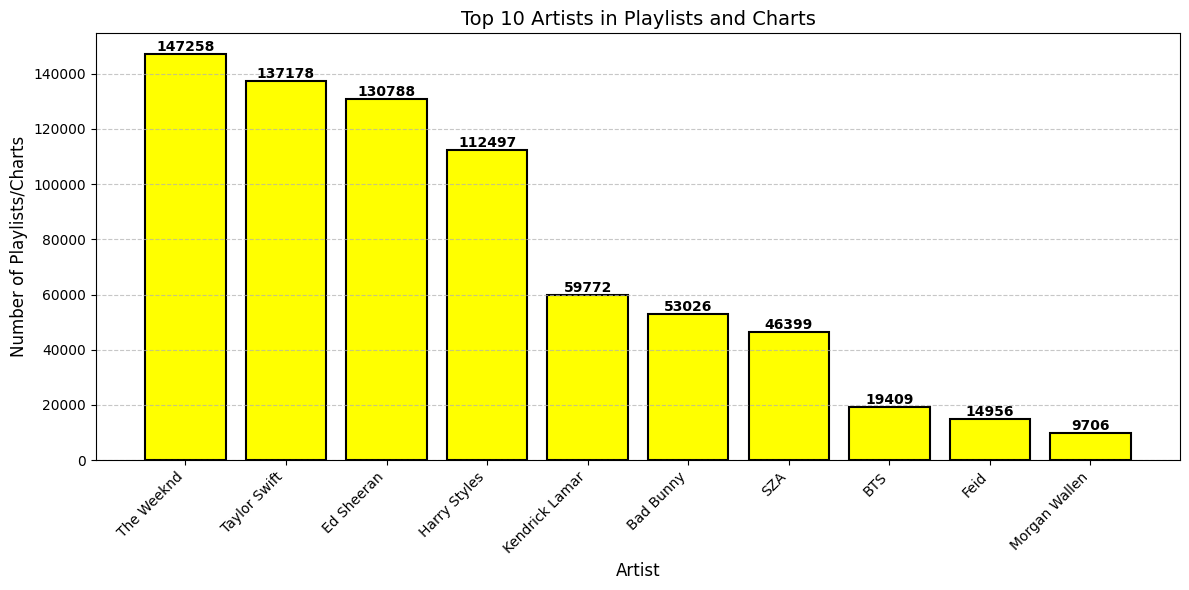

In [22]:
import pandas as pd
from collections import Counter

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSV/spotify-2023.csv', encoding='latin-1')

# Combine playlist and chart columns for overall presence
df['all_playlists'] = df['in_spotify_playlists'] + df['in_spotify_charts'] + df['in_apple_playlists'] + df['in_apple_charts']

# Get top 10 artists overall
top_10_artists = df['artist(s)_name'].value_counts().head(10).index

# Filter dataframe for top 10 artists
df_top_artists = df[df['artist(s)_name'].isin(top_10_artists)]

# Count playlist occurrences for each artist
playlist_counts = df_top_artists.groupby('artist(s)_name')['all_playlists'].sum().sort_values(ascending=False)

# Print the results
print("Most frequently appearing artists in playlists and charts:\n")
for artist, count in playlist_counts.items():
    print(f"{artist}: {count}")

# Create a bar chart with enhanced design
plt.figure(figsize=(12, 6))
bars = plt.bar(playlist_counts.index, playlist_counts.values, color='yellow', edgecolor='black', linewidth=1.5)
plt.xlabel("Artist", fontsize=12)
plt.ylabel("Number of Playlists/Charts", fontsize=12)
plt.title("Top 10 Artists in Playlists and Charts", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels above each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)),
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

#### **Summary**

**1. Overview of Datasheet**

1.   The dataset has 953 rows and 24 columns.
2.   The missing values are: **in_shazam_charts** - 50 and **key** - 95


**2. Basic Descriptive Statistics**

1.   The Stream column has the following statistics; **Mean** - 514,137,424, **Median** - 290,530,915, **Standard Deviation** - 566,856,949
2.   The most played tracks are from **2020s**, notably the highest played tracks are consist of **one artist**. Followed by two artirst and so on.

**3. Top Performers**

1.   The Top 5 Top Performing Tracks include; **Blinding Lights** by *The Weeknd*, **Shape of You** by *Ed Sheeran*, **Someone You Loved** by *Lewis Capaldi*,  **Dance Monkey** by *Tones and I* and **Sunflower - Spider-Man: Into the Spider-Verse** by * Post Malone, Swae Lee*
2.   The Top 5 Most Frequent Artist were **Taylor Swift, The Weeknd, Bad Bunny, SZA, and Harry Styles**.

**4. Temporal Trends**

1.   Notably the songs released each year from 1930 up until the early 2000s are stable, while in the 2010 to 2020 the number increased significantly.
2.   The number of streams per month are highest during January and May, which is induced by seasonal festivities (January) where most people are on vacation and Music Festivals (May).

**5. Genre and Music Characteristics**

1.   The number of tracks released increased significantly after the 2010 and 2020 having the highest number.
2.   The correlation between danceability_% and energy_% is 0.20, and the correlation between valence_% and acousticness_%: -0.

**6. Platform Popularity**

1.   The platform with highes of most played tracks belongs to Spotify playlist, followed by Apple playlist and Apple charts.

**7. Advance Analysis**

1.   Most of the top performing songs are in the C# key.
2.   The artists the lead the music charts are The Weeknd, Taylor Swift, Ed Sheeran, Harry Styles, Kendrick Lamar, Bad Bunny, SZA, BTS,
Feid, and Morgan Wallen.

###**Conclusion**

The student learned to utilize the concepts of statistics and graph visualization to represent the dataset of Spotify 2023 CSV. There are several factors to consider for the most played songs of that year, namely the artist/s, danceability, energy, valence, acousticness, the platform and date when the song is at its peak. Using different graphing tools such as bar, box, and line graphs are used to represent different outputs.












